**ERIS CORBAXHI TASK  SOLUTIONS**

In [ ]:
# Using Titanic train.csv dataset - same as previous HWs:

# a. [15pt] Prepare the dataset for analysis. In this analysis, we use "pclass", "fare", "age", "sex", "embarked" as input variables.
# Please perform necessary cleaning and transformation.

# b. [45pt] Implement the 2 clustering algorithms - K-means and Hierarchical Clustering, and add the cluster labels to the dataset as a new column.
# Please set # of clusters = 3 for both algorithms.

# c. [40pt] For K-mean algorithm, make an Elbow plot using K from 1 to 20 and calculate the WCSS.
# Please show the plot and answer the question "which K should we choose".

# You can modify the code I provided in the class - no need to write your own from scratch.

In [7]:
# a. [15pt]

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Fall2024_FINC514/code/train.csv'
df = pd.read_csv(file_path)

# Dropping irrelevant columns for this analysis
df_cleaned = df[['Pclass', 'Fare', 'Age', 'Sex', 'Embarked']].copy()

# Handling missing values
# Age: We will fill missing values with the median
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

# Embarked: Fill missing values with the most frequent value (mode)
df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# b. [45pt]

from sklearn.cluster import KMeans, AgglomerativeClustering

# Implementing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['KMeans_Cluster'] = kmeans.fit_predict(df_encoded)

# Implementing Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=3)
df_encoded['Hierarchical_Cluster'] = hierarchical.fit_predict(df_encoded)

# Showing the updated dataframe with cluster labels
print(df_encoded.head())


   Pclass     Fare   Age  Sex_male  Embarked_Q  Embarked_S  KMeans_Cluster  \
0       3   7.2500  22.0      True       False        True               0   
1       1  71.2833  38.0     False       False       False               2   
2       3   7.9250  26.0     False       False        True               0   
3       1  53.1000  35.0     False       False        True               2   
4       3   8.0500  35.0      True       False        True               0   

   Hierarchical_Cluster  
0                     2  
1                     1  
2                     2  
3                     1  
4                     2  


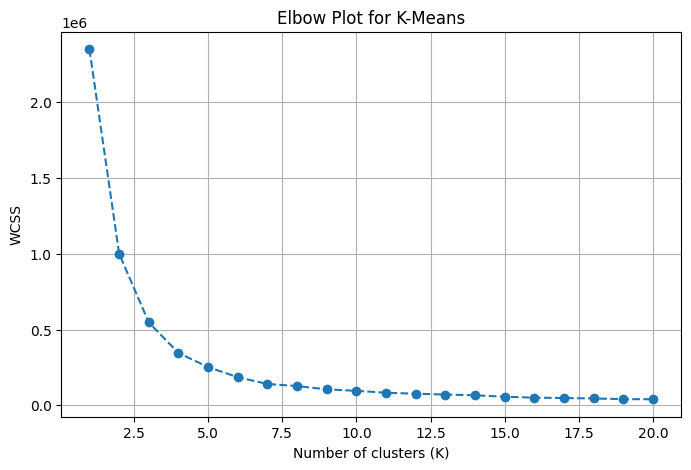

In [9]:
# c. [40pt]

import matplotlib.pyplot as plt
import numpy as np

# Elbow Method for K-Means to find the optimal K
wcss = []
K_range = range(1, 21)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded[['Pclass', 'Fare', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S']])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for K-Means')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# The Elbow plot above shows the WCSS (Within-Cluster Sum of Squares) for different numbers of clusters (K) from 1 to 20.
# To choose the optimal K, we look for the point where the WCSS begins to flatten out, which is known as the "elbow."
# In this case, the elbow appears to be around K = 4, suggesting that 4 clusters would be a reasonable choice for K-Means clustering.